In [2]:
import numpy as np
P = np.random.randn(8,8)
e,v = np.linalg.eig(P)

In [15]:
v.T.shape

(8, 8)

In [9]:
e

array([ 2.2845003 +0.j        , -3.1399502 +0.j        ,
        0.10705774+2.46647308j,  0.10705774-2.46647308j,
       -0.66609016+1.22954057j, -0.66609016-1.22954057j,
       -1.09202885+0.j        ,  0.50174187+0.j        ])

In [18]:
e,V = np.linalg.eig(P)
V = V.T - V.T[np.random.randint(0,len(V.T))]
Pdists = np.linalg.norm(V,axis=0)

In [19]:
Pdists

array([1.35088253, 1.18519162, 0.98592058, 1.2174986 , 1.59547152,
       1.8040292 , 1.11731866, 0.90392178])

In [3]:
from utilities import parse_keys
data = np.load("annulus_n128_r0.5_R1.0_s1623356304.npz",allow_pickle=True)
parsed_keys = parse_keys(data)

In [4]:
parsed_keys

defaultdict(list,
            {'data': [('data_t_0', 0),
              ('data_t_1', 1),
              ('data_t_2', 2),
              ('data_t_3', 3),
              ('data_t_4', 4),
              ('data_t_5', 5),
              ('data_t_6', 6),
              ('data_t_7', 7),
              ('data_t_8', 8),
              ('data_t_9', 9),
              ('data_t_10', 10),
              ('data_t_11', 11),
              ('data_t_12', 12),
              ('data_t_13', 13),
              ('data_t_14', 14),
              ('data_t_15', 15),
              ('data_t_16', 16),
              ('data_t_17', 17),
              ('data_t_18', 18),
              ('data_t_19', 19),
              ('data_t_20', 20),
              ('data_t_21', 21),
              ('data_t_22', 22),
              ('data_t_23', 23),
              ('data_t_24', 24),
              ('data_t_25', 25),
              ('data_t_26', 26),
              ('data_t_27', 27),
              ('data_t_28', 28),
              ('data_t_29', 29),
    

In [5]:
import data
X = data.annulus(500, 3, 5)

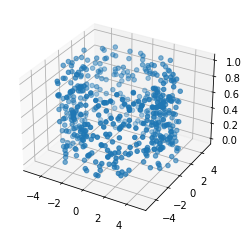

In [10]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[0][:,0],X[0][:,1],X[1])

In [12]:
import data
X = data.barbell(500)

In [15]:
X[1].shape

(131,)

In [16]:
X[0].shape

(500, 2)

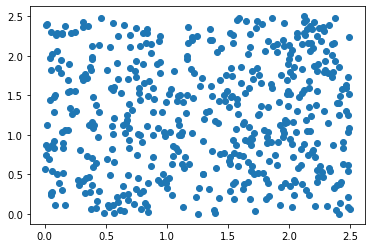

In [17]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(X[0][:,0],X[0][:,1])

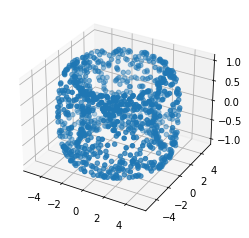

In [50]:
# Generate torus dataset.
def torus(N, inner_radius=1, outer_radius=4):
    """ Generate n-point hollow torus with one hole. """
    # begin by generating a hollow cylinder
    # from N random uniform points, normalized so that y^2 + z^2 = inner_radius^2
    X = np.random.rand(N,3)*2-1
    X[:,1:] /= np.sqrt(np.sum(X[:,1:]**2, axis=1))[:,None]*inner_radius
    x, y, z = X.T
    # Twist the cylinder
    # first, shift the cylinder on the y axis so that 0,0,0 lies at the center of the soon-to-be constructed donut
    rod_length = outer_radius-inner_radius
    y += outer_radius
    # Transform into polar coordinates around Z axis
    r = np.sqrt(x**2 + y**2)
    theta = x*2*np.pi # we can disregard the previous angle, which didn't mean anything
    # Back to cartesian coords
    x = np.cos(theta)*r
    y = np.sin(theta)*r

    # Recombine the variables
    X = np.column_stack((x,y,z))
    return X
X = torus(1000)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,0],X[:,1],X[:,2])

In [52]:
import numpy
numpy.savetxt("donut.csv", X, delimiter=",", fmt='%10.5f')

In [30]:
x = np.random.rand(500,4)
y = np.ones(500)*2

In [31]:
x

array([[0.96747745, 0.78180936, 0.30807073, 0.63566131],
       [0.17941284, 0.92878153, 0.29784718, 0.76004075],
       [0.4031208 , 0.38197124, 0.18105355, 0.58487339],
       ...,
       [0.8992539 , 0.21768927, 0.24828644, 0.61844813],
       [0.45438321, 0.80494501, 0.84695113, 0.92188287],
       [0.26126162, 0.95035227, 0.93415967, 0.04473716]])

In [32]:
x/y[:,None]

array([[0.48373872, 0.39090468, 0.15403536, 0.31783066],
       [0.08970642, 0.46439077, 0.14892359, 0.38002037],
       [0.2015604 , 0.19098562, 0.09052677, 0.2924367 ],
       ...,
       [0.44962695, 0.10884464, 0.12414322, 0.30922406],
       [0.2271916 , 0.40247251, 0.42347557, 0.46094143],
       [0.13063081, 0.47517613, 0.46707983, 0.02236858]])

In [29]:
y

array([0.28569465, 0.20222965, 0.41142782, 0.46649814, 0.6429325 ,
       0.8105352 , 0.51850144, 0.46286919, 0.48454505, 0.47513133,
       0.69948924, 0.35758606, 0.59605819, 0.35629752, 0.0446232 ,
       0.21706044, 0.42293551, 0.95180507, 0.57847251, 0.61339359,
       0.08400362, 0.01282225, 0.84969113, 0.58470123, 0.70784669,
       0.6446935 , 0.85158858, 0.11645669, 0.24677388, 0.27769636,
       0.43290787, 0.06975913, 0.26079804, 0.52233101, 0.23027061,
       0.0711397 , 0.61276087, 0.0083739 , 0.12137728, 0.11482696,
       0.45570993, 0.80669288, 0.15650871, 0.43608683, 0.74186733,
       0.1895821 , 0.52838557, 0.92889243, 0.17884908, 0.22075477,
       0.70242863, 0.60147032, 0.06411305, 0.91524188, 0.8645448 ,
       0.35722355, 0.44475201, 0.27259833, 0.67180055, 0.15748905,
       0.18192325, 0.18920572, 0.42985642, 0.94358073, 0.00202744,
       0.32338653, 0.10656352, 0.24652934, 0.81173437, 0.34895937,
       0.34466271, 0.37590935, 0.04126904, 0.34488793, 0.70363